# OpenCV to G-API side by side: In Python

 ### Python version of Graph-API brings several advantages:

* Ease of Use: Python is an extremely user-friendly language, which offers a gentler learning curve for beginners. This makes it easier for a wider range of people to use Graph-API.

* Rapid Prototyping: Python's simplicity and flexibility make it a popular language for rapid prototyping. Having a Python version of Graph-API will allow developers to quickly create and test new features or applications.

* Integration with Python Ecosystem: Python has a large and vibrant ecosystem of data science, machine learning, and artificial intelligence libraries (like NumPy, Pandas, scikit-learn, TensorFlow, PyTorch, etc.). A Python version of Graph-API could be easily integrated with these tools, providing a more powerful and versatile solution.

* Education and Research: Python is widely used in academia and industry for teaching and research because of its simplicity and wide range of scientific libraries. A Python version of Graph-API could help spread its use in these areas.

* Increased Adoption: As Python is one of the most popular programming languages globally, having a Python version of Graph-API could increase its adoption and bring it to a broader audience.

 ### The difference :

 To provide a more intuitive understanding of the differences between Python G-API and traditional OpenCV, let's consider the following two  code:


#### Traditional Opencv 
First, let's look at code using traditional OpenCV, which performs an image processing operation that enhances the contrast of an image:



In [5]:
# Import OpenCV.
import cv2 as cv
import matplotlib.pyplot as plt

def enhance_contrast_original(input_path: str):
    """
    This function enhances the contrast of the image by traditional Opencv, and then displays the image.

    Args:
    input_path (str): The path to the input image.
    
    Returns:
    None
    """
    # Load the input image.
    in_mat = cv.imread(input_path)

    # Display the original image.
    plt.imshow(cv.cvtColor(in_mat, cv.COLOR_BGR2RGB))
    plt.show()

    # Increase contrast (alpha=2.0) of the image.
    out_mat = cv.convertScaleAbs(in_mat, alpha=2.0, beta=0)

    # Display the enhanced image.
    plt.imshow(cv.cvtColor(out_mat, cv.COLOR_BGR2RGB))
    plt.show()


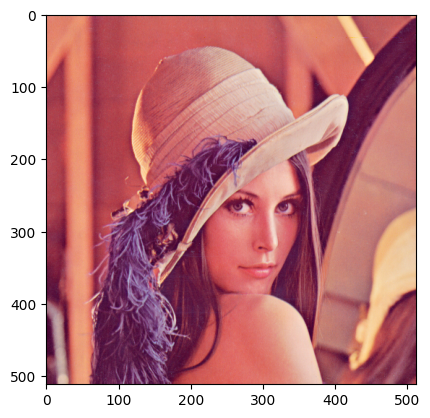

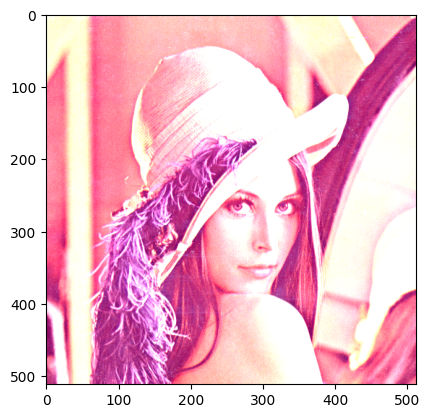

In [6]:
# Call the function
enhance_contrast_original("resources/Lenna_(test_image).png")

The first code uses traditional OpenCV functions for processing the image. It directly uses the **cv.convertScaleAbs** function to adjust the contrast of the image. The image data is processed immediately when the function is called.

#### Python G-API


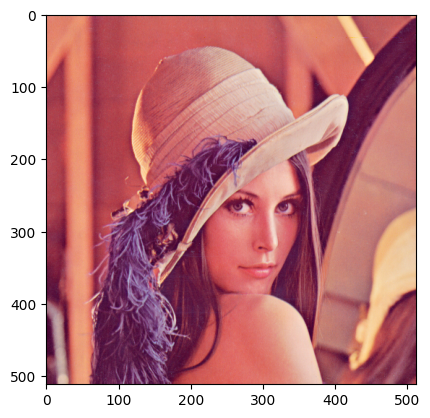

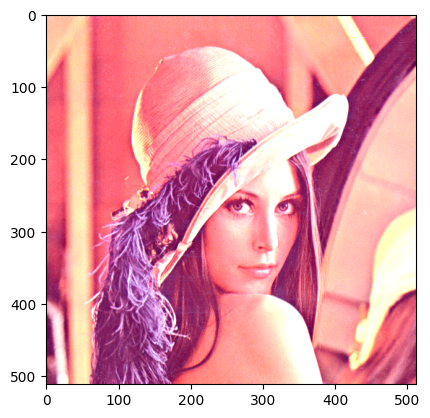

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def enhance_contrast(input_path: str, output_path: str):
    """
    This function enhances the contrast of the image by G-API, and then displays the image.

    Args:
    input_path (str): The path to the input image.
    output_path (str): The path to the output image.

    Returns:
    None
    """
    # Load the input image.
    in_mat: cv.Mat = cv.imread(input_path)
    out_mat: cv.Mat = cv.Mat(np.zeros_like(in_mat))

    # Display the input image.
    plt.imshow(cv.cvtColor(in_mat, cv.COLOR_BGR2RGB))
    plt.show()

    # Define the G-API computation (contrast enhancement operation).
    g_in: cv.GMat = cv.GMat()
    # Adjust the contrast (alpha=1.5)
    g_out: cv.GMat = cv.gapi.addWeighted(g_in, 1.5, g_in, 0, 0)
    g_computation: cv.GComputation = cv.GComputation(cv.GIn(g_in), cv.GOut(g_out))

    # Apply the computation to the input image.
    out_mat = g_computation.apply(cv.gin(in_mat))

    # Display the output (contrast-enhanced) image.
    plt.imshow(cv.cvtColor(out_mat, cv.COLOR_BGR2RGB))
    plt.show()

# Call the function
enhance_contrast("resources/Lenna_(test_image).png", "resources/Lenna_(out_image).png")



 The second code uses G-API for processing the image. It defines a computation graph using **cv.GMat** and **cv.GComputation**, and then applies this computation to the image. The actual processing doesn't happen until the apply function is called. This allows OpenCV to optimize the entire graph of computations as a whole, which can lead to performance improvements.

In summary, while both codes achieve the same result of enhancing the contrast of an image, they use different OpenCV APIs to do so. The traditional OpenCV code may be simpler and more straightforward for simple tasks, while the G-API code can provide better performance for complex tasks and pipelines.